In [1]:
# load the autoreload extension
%load_ext autoreload
# set the level of reloading
%autoreload 2

from util import *
import torch
from heuristic.heuristic_solver import HeuristicSolver
from nce_model import NCEModel
from tqdm import tqdm

# 0. Load data

In [2]:
data = [parse_datafile(f'../data/reduced/cvrp_10000_100_5/instance_{i}') for i in tqdm(range(10000))]

TRAIN_PERCENTAGE, VALIDATION_PERCENTAGE, TEST_PERCENTAGE = 0.75, 0.05, 0.20
num_train, num_val, num_test = int(len(data) * TRAIN_PERCENTAGE), int(len(data) * VALIDATION_PERCENTAGE), int(len(data) * TEST_PERCENTAGE)
vrps_train, vrps_val, vrps_test = data[:num_train], data[num_train:num_train + num_val], data[num_train + num_val:]
print(f'Number of training instances: {len(vrps_train)}, validation instances: {len(vrps_val)}, test instances: {len(vrps_test)}')

100%|██████████| 10000/10000 [08:09<00:00, 20.43it/s]

Number of training instances: 7500, validation instances: 500, test instances: 2000


# 1. 2-stage model

Epoch 0: Train Loss: 26320432.462937836 | Validation Loss: 23300184.880800396
Epoch 1: Train Loss: 24923606.60104446 | Validation Loss: 22966736.89648744
Epoch 2: Train Loss: 24825669.396474924 | Validation Loss: 22959989.31636693
Epoch 3: Train Loss: 24822855.256637033 | Validation Loss: 22956345.4635585
Epoch 4: Train Loss: 24822770.76951552 | Validation Loss: 22956298.06464124
Epoch 5: Train Loss: 24822783.411953505 | Validation Loss: 22956188.891125683
Epoch 6: Train Loss: 24822761.522853278 | Validation Loss: 22956362.110744298
Epoch 7: Train Loss: 24822758.62351698 | Validation Loss: 22956519.70398929
Epoch 8: Train Loss: 24822752.727999054 | Validation Loss: 22965862.68115708
Early stopping at epoch 8
Test Loss: 24545346.51619029
Testing example instance VRP instance: ../data/reduced/cvrp_10000_100_5/instance_8000, predicted cost: 1869.8160400390625, actual cost: 645.525893897357
Drawing actual solution


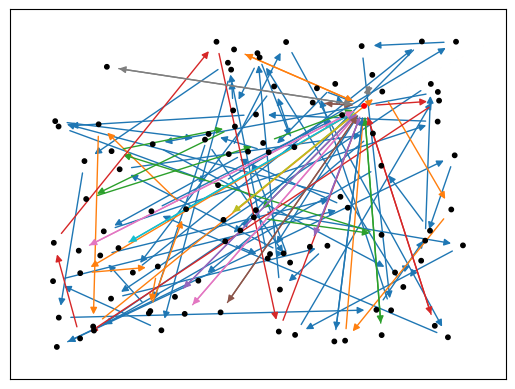

Drawing predicted solution


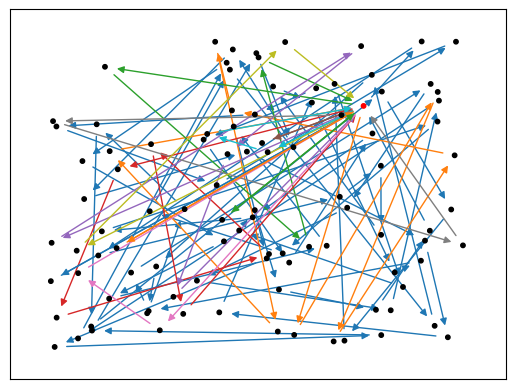

Actual edges (117): [0 -> 8, 0 -> 11, 0 -> 15, 0 -> 19, 0 -> 20, 0 -> 23, 0 -> 25, 0 -> 41, 0 -> 48, 0 -> 52, 0 -> 56, 0 -> 57, 0 -> 65, 0 -> 68, 0 -> 86, 0 -> 87, 0 -> 93, 0 -> 97, 1 -> 37, 2 -> 58, 3 -> 82, 4 -> 85, 5 -> 99, 6 -> 46, 7 -> 78, 8 -> 0, 9 -> 27, 10 -> 55, 11 -> 0, 12 -> 31, 13 -> 95, 14 -> 26, 15 -> 0, 16 -> 80, 17 -> 89, 18 -> 13, 19 -> 59, 20 -> 72, 21 -> 91, 22 -> 67, 23 -> 0, 24 -> 84, 25 -> 0, 26 -> 45, 27 -> 33, 28 -> 42, 29 -> 18, 30 -> 43, 31 -> 3, 32 -> 75, 33 -> 2, 34 -> 74, 35 -> 73, 36 -> 32, 37 -> 47, 38 -> 51, 39 -> 83, 40 -> 63, 41 -> 0, 42 -> 61, 43 -> 60, 44 -> 5, 45 -> 70, 46 -> 30, 47 -> 28, 48 -> 0, 49 -> 24, 50 -> 34, 51 -> 76, 52 -> 0, 53 -> 96, 54 -> 92, 55 -> 17, 56 -> 0, 57 -> 0, 58 -> 1, 59 -> 53, 60 -> 29, 61 -> 98, 62 -> 38, 63 -> 69, 64 -> 22, 65 -> 0, 66 -> 10, 67 -> 9, 68 -> 0, 69 -> 79, 70 -> 0, 71 -> 14, 72 -> 4, 73 -> 12, 74 -> 81, 75 -> 50, 76 -> 88, 77 -> 44, 78 -> 66, 79 -> 77, 80 -> 64, 81 -> 16, 82 -> 54, 83 -> 6, 84 -> 0, 85 -> 62

  0%|          | 0/2000 [00:00<?, ?it/s]

Set parameter Username
Academic license - for non-commercial use only - expires 2024-02-16


100%|██████████| 2000/2000 [05:37<00:00,  5.93it/s]

Accuracy: 0.20813862458356952, cost comparison: 5.834330329302419, regret: 166244.58585766287


In [3]:
from two_stage_model import TwoStageModel
model = TwoStageModel(vrps_train, vrps_val, vrps_test, lr=1e-2)
model.train(num_epochs=20)
model.test()
test_and_draw(model, vrps_test[0])
test(model, vrps_test, GurobiSolver)

# 2a. SPO+ model (using true costs during training)

In [ ]:
from spo_model import SPOModel
spo_model = SPOModel(vrps_train, vrps_val, vrps_test, solver_class=GurobiSolver, lr=1e-2)
spo_model.train(epochs=30, verbose=False, test_every=1)

0it [00:00, ?it/s]

Set parameter Username
Academic license - for non-commercial use only - expires 2024-02-16


7500it [06:28, 19.29it/s]


Epoch 1 / 30 done, mean loss: 672433.3458020834, validation loss: 670114.375


100%|██████████| 2000/2000 [05:32<00:00,  6.01it/s]


Accuracy: 0.21811394025414335, cost comparison: 5.72016246999478, regret: 162318.54291148475


7500it [06:49, 18.33it/s]


Epoch 2 / 30 done, mean loss: 658790.3882, validation loss: 662810.8125


100%|██████████| 2000/2000 [06:50<00:00,  4.87it/s]


Accuracy: 0.24165997273727877, cost comparison: 5.1934642046107475, regret: 144206.26488406435


7500it [07:15, 17.21it/s]


Epoch 3 / 30 done, mean loss: 634242.3470520834, validation loss: 656033.625


100%|██████████| 2000/2000 [05:36<00:00,  5.94it/s]


Accuracy: 0.2481075361575124, cost comparison: 5.088335508118594, regret: 140591.06372493794


7500it [07:07, 17.55it/s]


Epoch 4 / 30 done, mean loss: 608674.5841833333, validation loss: 649263.8125


100%|██████████| 2000/2000 [05:05<00:00,  6.56it/s]


Accuracy: 0.25116544935966484, cost comparison: 5.053275602663699, regret: 139385.4118423542


7500it [06:52, 18.20it/s]


Epoch 5 / 30 done, mean loss: 585684.3933, validation loss: 645228.4375


100%|██████████| 2000/2000 [05:01<00:00,  6.63it/s]


Accuracy: 0.2529902763722666, cost comparison: 5.013720828042821, regret: 138025.1888791683


7500it [07:15, 17.22it/s]


Epoch 6 / 30 done, mean loss: 564866.846625, validation loss: 640333.9375


100%|██████████| 2000/2000 [04:29<00:00,  7.43it/s]


Accuracy: 0.253723231328576, cost comparison: 5.017959887687499, regret: 138170.96309546125


7500it [06:57, 17.95it/s]


Epoch 7 / 30 done, mean loss: 545076.0925208334, validation loss: 636036.375


 59%|█████▉    | 1178/2000 [02:40<05:01,  2.72it/s]

In [1]:
spo_model.cost_model.eval()
vrp = vrps_test[2]
costs = spo_model.cost_model(torch.tensor([edge.features for edge in vrp.edges]))
# set the predicted edge costs
for i, edge in enumerate(vrp.edges):
    edge.predicted_cost = costs[i].detach().item()

solver = GurobiSolver(vrp)
solver.solve()
print(f'Actual objective: {solver.get_actual_objective()}')
draw_solution(solver)

solver = GurobiSolver(vrp, mode=SolverMode.PRED_COST)
solver.solve()
print(f'Predicted objective: {solver.get_actual_objective()}')
draw_solution(solver)

NameError: name 'spo_model' is not defined

In [6]:
# export the model
torch.save(spo_model.cost_model.state_dict(), '../models/spo_model.pt')

# 2b. SPO+ model (without using true costs during training)

In [7]:
from spo_model import SPOModelNoTrueCosts

spo_model_no_true_costs = SPOModelNoTrueCosts(vrps_train, vrps_val, vrps_test, solver_class=GurobiSolver, lr=1e-2)
spo_model_no_true_costs.train(epochs=20, verbose=False, test_every=1)

In [8]:
spo_model_no_true_costs.cost_model.eval()
vrp = vrps_test[0]
costs = spo_model_no_true_costs.cost_model(torch.tensor([edge.features for edge in vrp.edges]))
# set the predicted edge costs
for i, edge in enumerate(vrp.edges):
    edge.predicted_cost = costs[i].detach().item()

solver = GurobiSolver(vrp)
solver.solve()
print(f'Actual objective: {solver.get_actual_objective()}')
draw_solution(solver)

solver = GurobiSolver(vrp, mode=SolverMode.PRED_COST)
solver.solve()
print(f'Predicted objective: {solver.get_actual_objective()}')
draw_solution(solver)

# 3a. NCE model (without using true costs during training)

In [9]:
nce_model = NCEModel(vrps_train, vrps_val, vrps_test, solver_class=GurobiSolver, lr=1e-3)
nce_model.train(epochs=50, verbose=False, test_every=2)

In [ ]:
nce_model.cost_model.eval()
vrp = vrps_test[0]
costs = nce_model.cost_model(torch.tensor([edge.features for edge in vrp.edges]))
# set the predicted edge costs
for i, edge in enumerate(vrp.edges):
    edge.predicted_cost = costs[i].detach().item()

solver = GurobiSolver(vrp)
solver.solve()
print(f'Actual objective: {solver.get_actual_objective()}')
draw_solution(solver)

solver = GurobiSolver(vrp, mode=SolverMode.PRED_COST)
solver.solve()
print(f'Predicted objective: {solver.get_actual_objective()}')
draw_solution(solver)

# 3b. NCE model (using true costs during training)

In [ ]:
from nce_model import NCETrueCostLoss

nce_model_true_costs = NCEModel(vrps_train, vrps_val, vrps_test, solver_class=GurobiSolver, lr=8e-3)
nce_model_true_costs.criterion = NCETrueCostLoss({vrp: [vrp.actual_solution] for vrp in vrps_train})
nce_model_true_costs.train(epochs=40, verbose=False, test_every=1)

In [ ]:
nce_model_true_costs.cost_model.eval()
vrp = vrps_train[0]
costs = nce_model_true_costs.cost_model(torch.tensor([edge.features for edge in vrp.edges]))
# set the predicted edge costs
for i, edge in enumerate(vrp.edges):
    edge.predicted_cost = costs[i].detach().item()

solver = GurobiSolver(vrp)
solver.solve()
print(f'Actual objective: {solver.get_actual_objective()}')
draw_solution(solver)

solver = GurobiSolver(vrp, mode=SolverMode.PRED_COST)
solver.solve()
print(f'Predicted objective: {solver.get_actual_objective()}')
draw_solution(solver)